In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [2]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/data/npz_data', 
                                     "Point1_12_18_23_3X_interior_border_border" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (4, 1024, 1024, 3) & y.shape: (4, 1024, 1024, 1)


In [3]:
hist = np.load('/data/models/20190606_params/Point1_12_18_3X_interior_border_border_3_class_64_filters_256_densefilters.npz')

In [5]:
hist['loss_history'].tolist()['acc']
hist['loss_history']

array({'loss': [0.46741082296434333, 0.4506520419121986, 0.44387591271280397, 0.4369296444663577, 0.43029861980234146, 0.42483608818527385, 0.42004216009447753, 0.40985969989002924, 0.3737109080146166, 0.3434660013345047, 0.3292816092133557, 0.3192661236540086, 0.31242394502918935, 0.30710664599394266, 0.302533854944692, 0.2992461346690317, 0.296639523668109, 0.2942231834691684, 0.29178646939678726, 0.2894990947960306, 0.28752039089591414, 0.28549999279766686, 0.2841959090631168, 0.2831427095416384, 0.2808883482601414, 0.2794301046446092, 0.27805422365860655, 0.27667746559694917, 0.2751595374864381, 0.2740275973315311, 0.27319122751445923, 0.27224709956084125, 0.27087404007569116, 0.26983798057454667, 0.26879938367558875, 0.26828083027756505, 0.2667365357998711, 0.266014349681711, 0.26468726120041436, 0.2643938680391887, 0.2630879032934468, 0.26278798081121485, 0.2620143357701611, 0.2615314729473686, 0.26055771142778317, 0.25936196690329777, 0.2594502915970306, 0.25802216815885953, 0.2

In [43]:
MODEL_NAME = 'Point1_12_18_3X_interior_border_border' + '_4_class_unbalanced_64_filters_256_densefilters_epoch_80'
weights_path = os.path.join('/data/models/20190606_params', 
                            MODEL_NAME + ".h5")

In [44]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=256,
    n_conv_filters=64,
    dilated=True,
    n_features=4,
    norm_method='std',
    receptive_field=61,
    n_channels=3,    
    input_shape=tuple(X.shape[1:]))

run_sample_model.load_weights(weights_path)

In [45]:
test_images = run_sample_model.predict(X[:, :, :, :])

print('model output shape:', test_images.shape)

model output shape: (4, 1024, 1024, 4)


In [46]:
np.save('/data/models/20190606_params/' + MODEL_NAME + '_metrics', test_images)

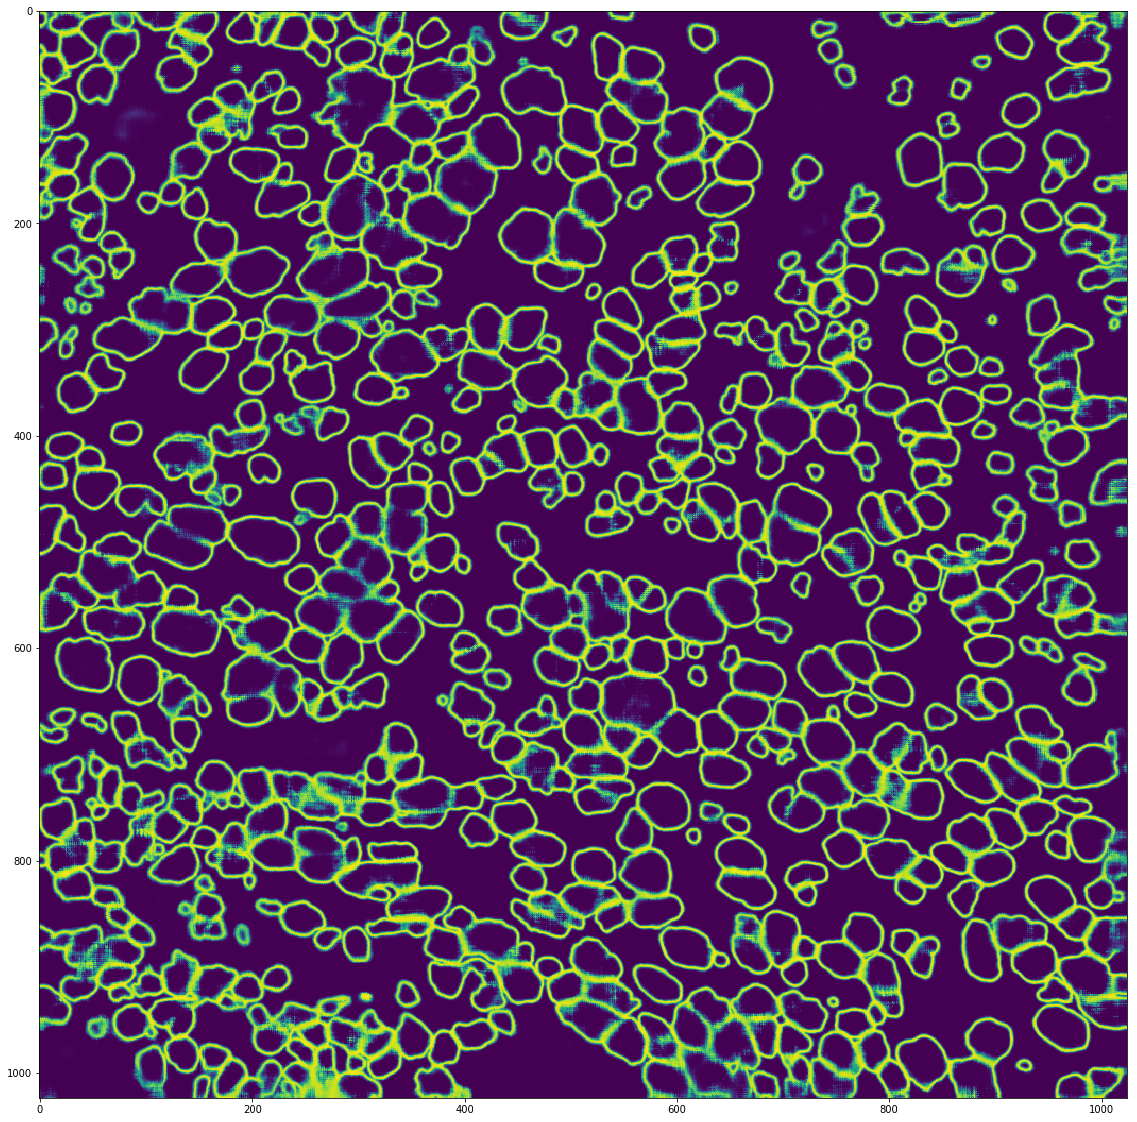

In [47]:
plt.figure(figsize = (20, 20))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
#plt.imshow(test_images[3, :, :, 0])
#plt.imshow(test_images[3, :, :, 1])
plt.imshow(test_images[3, :, :, 0] + test_images[3, :, :, 1])



In [ ]:
# import copy
# test_2 = copy.copy(test_images)
test_2 = np.load('/data/models/' + 'Point1_12_18_3X_interior_save_10' + '_metrics.npy')